#Problem 1: Pretraining (25 points)

Read the paper ”Training Compute-Optimal Large Language Models” ([Hoffmann et al., 2022](https://arxiv.org/pdf/2203.15556)) carefully and answer the following questions. For each question, provide specific evidence and citations from the paper to support your answer.

**Note**: You either choose to answer the questions and attach the pdf file in the beginning to the other questions or you can use Markdown text blocks within Colab Notebook to answer the questions. If you feel it would be easier to create it elsewhere and attach a screenshot, then you can do that as well.

1. (5 points) The paper presents three different approaches to determine the optimal trade-off between model size and number of training tokens. For Approach 2 (IsoFLOP profiles), what were the exponents a and b found for the relationships Nopt ∝ Ca and Dopt ∝ Cb? How do these values differ from Kaplan et al.’s findings, and what is the practical implication of this difference for training large language models?

Your answer:
The exponents of a and b found for the relationships Nopt ∝ Ca and Dopt ∝ Cb for Approach 2 were a=0.49 and b=0.51. These values differ from Kaplan et al.'s findings as in that paper the values for a and b found were a=0.73 and b=0.27. The exponent in Kaplan et al,'s research of a=0.73 and b=0.27 suggests that as compute is increased, the model size should be scaled up faster than the number of tokens, the findings of this paper imply that instead, the scaling of model size and number of tokens should be roughly equal. This means many current LLMs should actually have been trained on more tokens to be compute optimal.

2. (5 points) For a given compute budget of 5.76×10^23 FLOPs (same as Gopher), what is the optimal model size and number of training tokens according to the paper’s analysis? Compare this to Gopher’s actual configuration.

Your answer: According to Table 3 in the paper the optimal model size for a compute budget equal to Gopher's is 70B parameters, and this model should be trained on 1.5T tokens. Gopher's actual configuration is a model size of 280B parameters and it was trained on only 300B tokens. This shows Gopher is much too large and not trained on enough tokens. The paper illustrates that for a 280B parameter model (same size as Gopher), the compute budget should be 9.90e^24 and should be trained on 5.9T tokens in order to be compute optimal.

3. (5 points) Did Chinchilla’s improvements in performance come at a higher computational cost compared to Gopher? Explain your answer using evidence from the paper about compute budget and model efficiency.

Your answer: This paper questions the current belief that as compute budget increases, model size should be scaled up faster than the number of tokens the model is trained on in order to be optimal. Its findings show that a more optimal configuration of allocating the compute budget to model size and number of tokens trained is actually closer to scaling the model size and number of tokens trained roughly equally. The Chinchilla model was created to prove just this, it uses the same compute budget as Gopher, but follows these findings having only a model size of 70B params compared to Gopher's 280B, but was trained much longer on 1.4T tokens compared to Gopher's 300B. Therefore, as Chinchilla is a much smaller model than Gopher, no Chinchilla's improvements did not come at a higher computational cost, they both had the same compute budget.

4. (5 points) On the MMLU benchmark, what was Chinchilla’s average accuracy and how did it compare to both Gopher and human expert performance? Cite specific numbers from the paper.

Your answer: On the MMLU benchmark, Chinchilla had an average 5-shot accuracy of 67.6%. Gopher had an average 5-shot accuracy of 60.0% while the human expert performance was 89.8%. While Chinchilla's performance did not quite compare to average human expert accuracy, it did show a 7.6% improvement over Gopher while being a smaller model.

5. (5 points) According to the paper’s analysis, what are the implications for training a 1 trillion parameter model? Would this be compute-optimal with current practices? Explain using evidence from Table 3 of the paper.


Your answer: The implications of training a 1 trillion parameter model according to the paper would be to train it on 21.2 Trillion tokens in order to be sufficiently trained. This would also result in requiring a compute-budget of 1.27e+26 FLOPs. Unless one today had this much compute-budget, a 1 Trillion parameter model would not be compute-optimal with current practices, this compute budget is over 250x the compute used to train Gopher and the amount of tokens required to train the model sufficiently is over 15x the amount of tokens Chinchilla was trained on.

# Problem 2: Implementing ROUGE-L Score for LLM Summarization Evaluation (25 points)

Total Points: 25

### Background

The ROUGE-L score is a critical metric for evaluating text summarization quality, measuring the longest common subsequence (LCS) between a generated summary and reference summaries. This assignment will guide you through implementing and using this metric to evaluate LLM-generated summaries.

### Assignment Objectives

*   Understand and implement the ROUGE-L scoring metric
*   Work with real-world summarization data
*   Gain practical experience with LLM APIs
*   Apply text preprocessing techniques
*   Evaluate machine-generated summaries

### Tasks and Scoring Rubric
#### Part 1: Data Preparation (5 points)

- Load the CNN/DailyMail dataset using the Hugging Face datasets library (2 points)

In [ ]:
#Install datasets
!pip install datasets

In [ ]:
import datasets
# Loading 10 samples
from datasets import load_dataset

try:
    dataset = load_dataset('cnn_dailymail','3.0.0')
except FileNotFoundError as e:
    print(f'Dataset not found: {e}')
except ValueError as e:
    print(f'Value error encountered: {e}')
except Exception as e:
    print(f'An unexpected error occured: {e}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

- Implement text preprocessing functions (3 points)
  - Basic text cleaning (1 point)
  - Remove special characters (0.5 point)
  - Handle contractions and whitespace (0.5 point)

- Text tokenization and normalization (1.5 points)
  - NLTK tokenization with fallback (0.5 point)
  - Case normalization (0.5 point)
  - Word stemming using PorterStemmer (0.5 point)

- Error handling and robustness (0.5 point)
  - Proper error handling for all preprocessing steps
  - Appropriate fallback mechanisms

In [ ]:
!pip install nltk>=3.6.3

In [ ]:
# Download all required NLTK resources
import nltk

def setup_nltk():
    """Download required NLTK resources"""
    #YOUR CODE HERE
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('punkt_tab')

# Run setup before defining the class
setup_nltk()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
!pip install num2words

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.3 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0363b0da763c691e634928c7cee96e7bff391dddc5672f5c04b2321611c1663b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
from num2words import num2words
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import contractions
import re

class TextPreprocessor:
    def __init__(self):
        # Add stemmer
        # YOUR CODE HERE
        self.stemmer = PorterStemmer()


    # Keep existing expand_contractions method
    def expand_contractions(self, text):
        """
        Expand common contractions in English to their full form (I used the contractions library for simplicity)
        """
        return contractions.fix(text)

    def remove_special_characters(self, text):
        """
        More careful handling of quotation marks and numbers
        """
        #YOUR CODE HERE
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)

    def normalize_whitespace(self, text):
        """
        Remove extra spaces
        """
        return re.sub(r'\s+', ' ', text).strip()

    def tokenize_text(self, text):
        """
        Updated tokenization to better match rouge-score
        """
        # YOUR CODE HERE
        try:
            tokens = word_tokenize(text)
        except (LookupError, OSError) as e:
            nltk.download('punkt')
            tokens = word_tokenize(text)
        return tokens

    def normalize_case(self, tokens):
        """
        Add stemming to handle word variations
        """
        # YOUR CODE HERE
        return [self.stemmer.stem(token.lower()) for token in tokens]

    def preprocess(self, text, show_contractions=False):
        #YOUR CODE HERE
        try:
            text = self.expand_contractions(text)

            if show_contractions:
                print(f'After expanding contractions: {text}')

            text = self.remove_special_characters(text)
            text = self.normalize_whitespace(text)
            tokens = self.tokenize_text(text)
            normalized_tokens = self.normalize_case(tokens)
            return ' '.join(normalized_tokens)
        except Exception as e:
            print(f'Erorr during preprocessing: {e}')
            return ''

  #return statement

#Please stick to the rubric to score full points

In [ ]:
# Initialize preprocessor
preprocessor = TextPreprocessor()

# Test with sample text
sample_text = """
The quick brown fox jumps over the lazy dog! He's going to Paul's house. Paul and the fox are friends since they have been little when they went to pre-school together.
1234 @#$%^&*() The numbers should stay but special characters removed.
"""
preprocessed_text = preprocessor.preprocess(sample_text, show_contractions=True)
print(f'Preprocessed Sample Text: {preprocessed_text}')

After expanding contractions: 
The quick brown fox jumps over the lazy dog! He is going to Paul's house. Paul and the fox are friends since they have been little when they went to pre-school together.
1234 @#$%^&*() The numbers should stay but special characters removed.

Preprocessed Sample Text: the quick brown fox jump over the lazi dog he is go to paul hous paul and the fox are friend sinc they have been littl when they went to preschool togeth 1234 the number should stay but special charact remov


#### Part 2: Generate Summaries using OpenAI API (5 points)

- Set up OpenAI API authentication (1 point)
- Implement API calling function (2 points)
- Handle API responses and errors (2 points)

In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.54.5
    Uninstalling openai-1.54.5:
      Successfully uninstalled openai-1.54.5


In [ ]:
from google.colab import userdata
import openai
import os
from getpass import getpass

if 'OPENAI_API_KEY' not in os.environ:
    os.environ['OPENAI_API_KEY'] = getpass('Enter your OpenAI API key: ')
openai.api_key = os.getenv('OPENAI_API_KEY')

def get_summary(text):
    #YOUR CODE HERE
    try:
        response = openai.ChatCompletion.create(
            model='gpt-3.5-turbo',
            messages=[{"role": "user", "content": f"""
                You are a helpful summarizing assistant. You will be given a prompt and your job is to provide a concise summary and nothing else.
                Here is your prompt: {text}"""}],
            max_tokens=250,
            temperature=0.7,
        )
        return response.choices[0].message['content'].strip()
    except openai.error.RateLimitError:
        print('Rate limit exceeded. Retrying in 10 seconds...')
        time.sleep(10)
        return get_summary(text)
    except openai.error.OpenAIError as e:
        print(f'An error occured: {e}')
        return ''

# Example usage
summary = get_summary(sample_text)
print(f'Generated Summary: {summary}')

Generated Summary: The quick brown fox jumps over the lazy dog and goes to Paul's house. Paul and the fox have been friends since preschool.1234


#### Part 3: ROUGE-L and ROUGE-LSum Implementation (15 points)

3.1 Basic ROUGE-L Implementation (6 points)

  3.1.1 LCS table implementation (3 points)

In [ ]:
import numpy as np
from typing import List, Dict

def get_lcs_table(ref_tokens: List[str], pred_tokens: List[str]) -> np.ndarray:
    """
    Compute the Longest Common Subsequence table (2 points)
    """
    #YOUR CODE HERE
    m, n = len(ref_tokens), len(pred_tokens)
    lcs_table = np.zeros((m + 1, n + 1), dtype=int)

    # Use an efficient DP approach to compute the LCS table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if ref_tokens[i - 1] == pred_tokens[j - 1]:
                lcs_table[i][j] = lcs_table[i - 1][j - 1] + 1
            else:
                lcs_table[i][j] = max(lcs_table[i - 1][j], lcs_table[i][j - 1])

    return lcs_table

3.1.2 Implement ROUGE-L score calculation (3 points)

In [ ]:
def compute_rouge_l(reference: List[str], prediction: List[str], beta: float = 1.2) -> Dict[str, float]:
    """
    Basic ROUGE-L computation (4 points)
    """
    #YOUR CODE HERE

    # Get LCS table
    lcs_table = get_lcs_table(reference, prediction)
    lcs_length = lcs_table[len(reference)][len(prediction)]

    # Calculate precision, recall and F1-score
    precision = lcs_length / len(prediction) if len(prediction) > 0 else 0.0
    recall = lcs_length / len(reference) if len(reference) > 0 else 0.0

    if precision + recall == 0:
        f1_score = 0.0
    else:
        f1_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

    # Return the scores
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1_score,
    }

3.2 Implement Rouge-LSum (5 points)

3.2.1 Split tokens into sentences (1 points)

In [ ]:
def split_into_sentences(tokens: List[str]) -> List[List[str]]:
    """
    Split tokens into sentences (2 points)
    """
    #YOUR CODE HERE
    sentences = []
    cur_sentence = []
    sentence_end_tokens = {'.', '!', '?'}

    # Build a setnence until we encounter the end token, once we do save the full sentence and start building the next one
    for token in tokens:
        cur_sentence.append(token)
        if token in sentence_end_tokens:
            sentences.append(cur_sentence)
            cur_sentence = []

    if cur_sentence:
        sentences.append(cur_sentence)

    return sentences

3.2.2 ROUGE-LSum (4 points)

In [ ]:

def compute_rouge_lsum(reference: List[str], prediction: List[str], beta: float = 1.2) -> Dict[str, float]:
    """
    Compute ROUGE-LSum score (5 points)
    """
    # YOUR CODE HERE

    # Split tokens into sentences
    ref_sentences = split_into_sentences(reference)
    pred_sentences = split_into_sentences(prediction)

    total_lcs_length = 0
    total_ref_length = sum(len(ref_sentence) for ref_sentence in ref_sentences)
    total_pred_length = sum(len(pred_sentence) for pred_sentence in pred_sentences)

    # Iterate over each predicted sentence and compute its LCS with each reference sentence, tracking the maximum
    for ref_sentence in ref_sentences:
        max_lcs_length = 0

        for pred_sentence in pred_sentences:
            lcs_table = get_lcs_table(ref_sentence, pred_sentence)
            lcs_length = lcs_table[len(ref_sentence)][len(pred_sentence)]
            max_lcs_length = max(max_lcs_length, lcs_length)

        total_lcs_length += max_lcs_length

    # Calculate rouge-lsum metrics
    precision = total_lcs_length / total_pred_length if total_pred_length > 0 else 0.0
    recall = total_lcs_length / total_ref_length if total_ref_length > 0 else 0.0

    if precision + recall == 0:
        f1_score = 0.0
    else:
        f1_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

    return {
        'precision': precision,
        'recall': recall,
        'f1': f1_score
    }

3.3 Testing Implementation (4 points)

Test ROUGE implementation using CNN/DailyMail dataset and OpenAI summarization
Points for:

- Dataset integration (0.5 point)
  - Successfully load CNN/DailyMail dataset
  - Handle data extraction properly

- Preprocessing implementation (0.5 point)
  - Implement text cleaning and tokenization
  - Handle preprocessing edge cases

- API integration (0.5 point)
  - Implement OpenAI API calls
  - Handle API errors appropriately

- Official library comparison (1.5 points)
  - Install and integrate rouge-score library (0.5 point)
  - Compare custom scores with official library scores (0.5 point)
  - Analyze and document differences (max difference < 5%) (0.5 point)

- Score calculation and results analysis (1 point)
  - Calculate and display both custom and official ROUGE scores
  - Provide clear comparison of results
  - Understand any significant differences and potential improvements

In [ ]:
# First install the rouge-score library
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=86af315ae1cfc082c90f51fe21d37b17e3853d7f0b1df3cb2388998627c6404d
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

def test_rouge_with_dataset(sample_idx: int):
    """
    Test ROUGE implementation using a single article from CNN/DailyMail dataset

    Args:
        sample_idx: Index of the article to test
    """
    # Initialize preprocessor and official scorer
    # YOUR CODE HERE
    preprocessor = TextPreprocessor()
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

    try:
        # Get the article
        article = dataset['train'][sample_idx]

        # Get original article and reference summary
        original_text = article['article']
        reference_summary = article['highlights']

        # Generate summary using OpenAI
        generated_summary = get_summary(original_text)

        # Preprocess texts for custom implementation
        preprocessed_ref = preprocessor.preprocess(reference_summary)
        preprocessed_pred = preprocessor.preprocess(generated_summary)

        # Calculate custom ROUGE scores *********** NOTE I used a beta of 1 to match the official implementation
        rouge_l_scores = compute_rouge_l(preprocessed_ref.split(), preprocessed_pred.split(), beta=1.0)
        rouge_lsum_scores = compute_rouge_lsum(preprocessed_ref.split(), preprocessed_pred.split(), beta=1.0)

        # Calculate official ROUGE scores
        official_scores = scorer.score(preprocessed_ref, preprocessed_pred)

        # Calculate differences
        max_diff = max(
            abs(rouge_l_scores['precision'] - official_scores['rougeL'].precision),
            abs(rouge_l_scores['recall'] - official_scores['rougeL'].recall),
            abs(rouge_l_scores['f1'] - official_scores['rougeL'].fmeasure),
        )

        # Print detailed results
        # Please modify this code according to variable names you choose, you must print all these metrics to score full points.

        #####################################################################################################################
        print(f"\nArticle Results:")
        print("-" * 50)
        print("\nReference Summary:")
        print(reference_summary[:200] + "..." if len(reference_summary) > 200 else reference_summary)
        print("\nGenerated Summary:")
        print(generated_summary[:200] + "..." if len(generated_summary) > 200 else generated_summary)

        print("\nCustom ROUGE-L Scores:")
        print(f"Precision: {rouge_l_scores['precision']:.3f}")
        print(f"Recall: {rouge_l_scores['recall']:.3f}")
        print(f"F1: {rouge_l_scores['f1']:.3f}")

        print("\nOfficial ROUGE-L Scores:")
        print(f"Precision: {official_scores['rougeL'].precision:.3f}")
        print(f"Recall: {official_scores['rougeL'].recall:.3f}")
        print(f"F1: {official_scores['rougeL'].fmeasure:.3f}")

        print("\nCustom ROUGE-LSum Scores:")
        print(f"Precision: {rouge_lsum_scores['precision']:.3f}")
        print(f"Recall: {rouge_lsum_scores['recall']:.3f}")
        print(f"F1: {rouge_lsum_scores['f1']:.3f}")

        print("\nImplementation Comparison:")
        print(f"Maximum difference between implementations: {max_diff:.3f}")
        if max_diff < 0.05:
            print("✓ Custom implementation closely matches the official library (within 5% threshold)")
        else:
            print("⚠ Custom implementation shows significant differences from the official library")

        #return results
        #####################################################################################################################

    except Exception as e:
        print(f"Error processing article {sample_idx}: {e}")
     # Print keys to debug
        return None


#Please stick to the rubric to score full points and for easier grading.
#Print results or summarize in a pdf. If you print them clearly, that should be good enough,
#but it is much easier to evaluate if all the results are summarized in a pdf and attached with the respective question.
#Please check if you have implemented all the sub points within the rubric.

In [ ]:
import random

# Get dataset size
dataset_size = len(dataset['train'])

# Generate 2 random indices
random_indices = random.sample(range(dataset_size), 2)

# Test each randomly selected article
for idx in random_indices:
    test_rouge_with_dataset(idx)


Article Results:
--------------------------------------------------

Reference Summary:
Dunkin' Buddy acts as reservoir and sits inside mug, immersed in drink .
The drinker dunks their biscuit into the .
one-inch deep holder in the middle of the cup, safe in the knowledge .
that any bisc...

Generated Summary:
A gadget called the Dunkin' Buddy has been invented to prevent biscuits from getting lost at the bottom of a mug when dunked in tea or coffee. The device acts as a reservoir for the biscuit and can be...

Custom ROUGE-L Scores:
Precision: 0.144
Recall: 0.265
F1: 0.187

Official ROUGE-L Scores:
Precision: 0.144
Recall: 0.265
F1: 0.187

Custom ROUGE-LSum Scores:
Precision: 0.144
Recall: 0.265
F1: 0.187

Implementation Comparison:
Maximum difference between implementations: 0.000
✓ Custom implementation closely matches the official library (within 5% threshold)

Article Results:
--------------------------------------------------

Reference Summary:
Senior Foreign Office figure: ‘We

### Submission Requirements

Submit a Python notebook (.ipynb) containing:

1. All implemented functions with appropriate documentation
2. Example runs with sample data
3. Brief analysis of findings (1-2 paragraphs)

#### Notes
- Make sure to handle your API keys securely
- Include error handling in your implementation
- Comment your code appropriately
- Include citations for any external resources used

### References

See, A., Liu, P. J., & Manning, C. D. (2017). Get to the point: Summarization with pointer-generator networks. arXiv preprint arXiv:1704.04368.

# Problem 3: Fine-Tune a Generative AI Model for Dialogue Summarization (25 points)

In this notebook, you will fine-tune an existing LLM from Hugging Face for enhanced dialogue summarization. You will use the [FLAN-T5](https://huggingface.co/docs/transformers/model_doc/flan-t5) model, which provides a high quality instruction tuned model and can summarize text out of the box. To improve the inferences, you will explore a full fine-tuning approach and evaluate the results with ROUGE metrics. Then you will perform Parameter Efficient Fine-Tuning (PEFT), evaluate the resulting model and see that the benefits of PEFT outweigh the slightly-lower performance metrics.

# Table of Contents

- [ 1 - Load Required Dependencies, Dataset and LLM](#1)
  - [ 1.1 - Set up Required Dependencies](#1.1)
  - [ 1.2 - Load Dataset and LLM](#1.2)
  - [ 1.3 - Test the Model with Zero Shot Inferencing](#1.3)
- [ 2 - Perform Full Fine-Tuning](#2)
  - [ 2.1 - Preprocess the Dialog-Summary Dataset](#2.1)
  - [ 2.2 - Fine-Tune the Model with the Preprocessed Dataset](#2.2)
  - [ 2.3 - Evaluate the Model Qualitatively (Human Evaluation)](#2.3)
  - [ 2.4 - Evaluate the Model Quantitatively (with ROUGE Metric)](#2.4)
- [ 3 - Perform Parameter Efficient Fine-Tuning (PEFT)](#3)
  - [ 3.1 - Setup the PEFT/LoRA model for Fine-Tuning](#3.1)
  - [ 3.2 - Train PEFT Adapter](#3.2)
  - [ 3.3 - Evaluate the Model Qualitatively (Human Evaluation)](#3.3)
  - [ 3.4 - Evaluate the Model Quantitatively (with ROUGE Metric)](#3.4)

<a name='1'></a>
## 1 - Load Required Dependencies, Dataset and LLM (5 points)

<a name='1.1'></a>
### 1.1 - Set up Required Dependencies (1 point)

Now install the required packages for the LLM and datasets.



In [ ]:
%pip install -U datasets==2.17.0

%pip install --upgrade pip
%pip install --disable-pip-version-check \
    torch==1.13.1 \
    torchdata==0.5.1 --quiet

%pip install \
    transformers==4.27.2 \
    evaluate==0.4.0 \
    rouge_score==0.1.2 \
    loralib==0.1.1 \
    peft==0.3.0 --quiet

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2023.10.0 which is incompatible.
   ━━━━━━━━━

Import the necessary components. Some of them are new for this week, they will be discussed later in the notebook.

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
import evaluate
import pandas as pd
import numpy as np

<a name='1.2'></a>
### 1.2 - Load Dataset and LLM (2 points)

You are going to continue experimenting with the [DialogSum](https://huggingface.co/datasets/knkarthick/dialogsum) Hugging Face dataset. It contains 10,000+ dialogues with the corresponding manually labeled summaries and topics.

In [ ]:
huggingface_dataset_name = "knkarthick/dialogsum"

# load dataset from HF
# ADD Your Code Here
try:
    dataset = load_dataset(huggingface_dataset_name)
    print('Dataset loaded successfully.')
except FileNotFoundError as e:
    print(f'Dataset not found: {e}')
except ValueError as e:
    print(f'Value error encountered: {e}')
except Exception as e:
    print(f'An unexpected error occured: {e}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/download/streaming_download_manager.py:784: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating validation split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/download/streaming_download_manager.py:784: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/download/streaming_download_manager.py:784: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Dataset loaded successfully.


Load the pre-trained [FLAN-T5 model](https://huggingface.co/docs/transformers/model_doc/flan-t5) and its tokenizer directly from HuggingFace. Notice that you will be using the [small version](https://huggingface.co/google/flan-t5-small) of FLAN-T5. Setting `torch_dtype=torch.bfloat16` specifies the memory type to be used by this model.

In [ ]:
model_name='google/flan-t5-small'

# load model from HF
# ADD Your Code Here
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    print('Tokenizer loaded successfully.')

    model = AutoModelForSeq2SeqLM.from_pretrained(model_name, torch_dtype=torch.bfloat16)
    print('Model loaded successfully.')
except Exception as e:
    print(f'An error occured while loading the model or tokenizer: {e}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Tokenizer loaded successfully.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Model loaded successfully.


It is possible to pull out the number of model parameters and find out how many of them are trainable. The following function can be used to do that, at this stage, you do not need to go into details of it.

In [ ]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

# model from previous cell
print(print_number_of_trainable_model_parameters(model))

trainable model parameters: 76961152
all model parameters: 76961152
percentage of trainable model parameters: 100.00%


<a name='1.3'></a>
### 1.3 - Test the Model with Zero Shot Inferencing (2 Points)

Test the model with the zero shot inferencing. You can see that the model struggles to summarize the dialogue compared to the baseline summary, but it does pull out some important information from the text which indicates the model can be fine-tuned to the task at hand.

In [ ]:
# ADD Your Code Here
test_dialogue = """
A: Hey, what time are you going to be in tomorrow?
B: Around 10am what about you?
A: 9am, we have a meeting don't you remember.
B: Oh shoot thanks for reminding me.
"""

prompt = f"Summarize the following conversation:\n\n{test_dialogue}\n\nSummary:"

# Tokenize input
inputs = tokenizer(prompt, return_tensors='pt', max_length=512, truncation=True)

# Generate summary
summary_ids = model.generate(
    inputs['input_ids'],
    max_length=50,
    num_beams=4,
    early_stopping=True
)

generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Print results
print(f'Generated Summary (Zero-Shot Inferencing): {generated_summary}')

baseline_summary = 'A and B are discussing when they are going to office when A reminds B of a meeting at 9am.'
print(f'Human Baseline Summary: {baseline_summary}')

Generated Summary (Zero-Shot Inferencing): A: I'm going to be there at 9am.
Human Baseline Summary: A and B are discussing when they are going to office when A reminds B of a meeting at 9am.


Doing a simple qualitative analysis of the generated summary vs the baseline summary I provided shows that the current model in its current state can not provide a summary that captures the important information in the input. Even with the instruction to summarize the model still just replies to the conversation as if it was A's turn to speak.

<a name='2'></a>
## 2 - Perform Full Fine-Tuning (10 points)

<a name='2.1'></a>
### 2.1 - Preprocess the Dialog-Summary Dataset (2 points)

You need to convert the dialog-summary (prompt-response) pairs into explicit instructions for the LLM. Prepend an instruction to the start of the dialog with `Summarize the following conversation` and to the start of the summary with `Summary` as follows:

Training prompt (dialogue):
```
Summarize the following conversation.

    Chris: This is his part of the conversation.
    Antje: This is her part of the conversation.
    
Summary:
```

Training response (summary):
```
Both Chris and Antje participated in the conversation.
```

Then preprocess the prompt-response dataset into tokens and pull out their `input_ids` (1 per token).

In [ ]:
def tokenize_function(examples):
    # ADD Your Code Here

    prompt_template = 'Summarize the following conversation\n\n{dialogue}\n\nSummary:'

    inputs = [
        prompt_template.format(dialogue=dialogue) for dialogue in examples['dialogue']
    ]

    model_inputs = tokenizer(
        inputs,
        max_length=512,
        padding='max_length',
        truncation=True
    )

    labels = tokenizer(
        examples['summary'],
        max_length=128,
        padding='max_length',
        truncation=True
    )

    # Ensure the padding token ID is replaced with -100 so Trainer knows to ingore those tokens for loss computation
    labels['input_ids'] = [
        [(l if l != tokenizer.pad_token_id else -100) for l in label] for label in labels['input_ids']
    ]

    model_inputs['labels'] = labels['input_ids']

    return model_inputs

# The dataset actually contains 3 diff splits: train, validation, test.
# The tokenize_function code is handling all data across all splits in batches.

# ADD Your Code Here
tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=dataset['train'].column_names)

Map:   0%|          | 0/12460 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

To save some time in the lab, you will subsample the dataset:

In [ ]:
tokenized_datasets = tokenized_datasets.filter(lambda example, index: index % 100 == 0, with_indices=True)

Filter:   0%|          | 0/12460 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1500 [00:00<?, ? examples/s]

Check the shapes of all three parts of the dataset:

In [ ]:
print(f"Shapes of the datasets:")
print(f"Training: {tokenized_datasets['train'].shape}")
print(f"Validation: {tokenized_datasets['validation'].shape}")
print(f"Test: {tokenized_datasets['test'].shape}")

print(tokenized_datasets)

Shapes of the datasets:
Training: (125, 3)
Validation: (5, 3)
Test: (15, 3)
DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 125
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 5
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 15
    })
})


The output dataset is ready for fine-tuning.

<a name='2.2'></a>
### 2.2 - Fine-Tune the Model with the Preprocessed Dataset (3 points)

Now utilize the built-in Hugging Face `Trainer` class (see the documentation [here](https://huggingface.co/docs/transformers/main_classes/trainer)). Pass the preprocessed dataset with reference to the original model. Other training parameters are found experimentally and there is no need to go into details about those at the moment.

In [ ]:
output_dir = f'./dialogue-summary-training-{str(int(time.time()))}'

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=1e-5,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_steps=1,
    max_steps=1
)

# ADD Your Code Here
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer
)

Start training process...



The code trainer.train() utilizes the Weights & Biases (wandb) library to track and visualize the training process. To proceed, you'll need to sign up for a wandb account using your Gmail and then enter your unique API token to authenticate and enable logging of the training progress.

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
1,2.421900


TrainOutput(global_step=1, training_loss=2.421875, metrics={'train_runtime': 634.4137, 'train_samples_per_second': 0.013, 'train_steps_per_second': 0.002, 'total_flos': 1487124037632.0, 'train_loss': 2.421875, 'epoch': 0.06})

In [ ]:
# Added this to save the checkpoint
trainer.save_model(output_dir)

Create an instance of the `AutoModelForSeq2SeqLM` class for the instruct model:

In [ ]:
# prompt: I need to mount my google drive folder, MountDrive,  within which, I got a flan-diaglogue-summary-checkpoint folder, where the model checkpoint has

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use the `flan-diaglogue-summary-checkpoint` folder, found in this [drive link](https://drive.google.com/drive/folders/1hyrqnO3FcGiK5fIQPlHtpmjLt_LQqh_f?usp=drive_link).



In [ ]:
# Load tokenizer and models
# Import T5Tokenizer from transformers
from transformers import T5Tokenizer, AutoModelForSeq2SeqLM

# Define the model path using the config.json path
model_path = 'google/flan-t5-base'

# Load tokenizer and models
# Use the default T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")  # or "t5-base", "t5-large", etc.

# Load the model in a way that is compatible with single-GPU environments
instruct_model = AutoModelForSeq2SeqLM.from_pretrained(
    model_path,
    torch_dtype=torch.bfloat16,
    # The following line addresses the multi-GPU loading issue
    device_map="auto",
)

# Move model to GPU if available (optional, as device_map="auto" should handle it)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
instruct_model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

<a name='2.3'></a>
### 2.3 - Evaluate the Model Qualitatively (Human Evaluation) (2 points)

As with many GenAI applications, a qualitative approach where you ask yourself the question "Is my model behaving the way it is supposed to?" is usually a good starting point. In the example below (the same one we started this notebook with), you can see how the fine-tuned model is able to create a reasonable summary of the dialogue compared to the original inability to understand what is being asked of the model.

In [ ]:
# ADD Your Code Here
model.eval()
instruct_model.eval()

ref_summaries = []
base_summaries = []
ft_summaries = []

for i, test_sample in enumerate(tokenized_datasets['test']):

    if i >= 10:
        break

    # Decode input text from token IDs
    input_text = tokenizer.decode(test_sample['input_ids'], skip_special_tokens=True)

    # Tokenize input
    input_ids = torch.tensor([test_sample['input_ids']]).to(instruct_model.device)

    # Generate summary with original
    summary_ids = model.generate(
        input_ids,
        max_length=50,
        num_beams=5,
        early_stopping=True
    )

    # Generate summary with fine tuned
    ft_summary_ids = instruct_model.generate(
        input_ids,
        max_length=50,
        num_beams=5,
        early_stopping=True
    )

    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    ft_generated_summary = tokenizer.decode(ft_summary_ids[0], skip_special_tokens=True)

    # Decode the reference summary
    ref_summary = tokenizer.decode([token_id for token_id in test_sample['labels'] if token_id != -100], skip_special_tokens=True)

    ref_summaries.append(ref_summary)
    base_summaries.append(generated_summary)
    ft_summaries.append(ft_generated_summary)

    # Print results for this test sample
    print(f'Test Sample {i+1}:')
    print(f'Input Dialogue: {input_text}')
    print(f'Reference Summary: {ref_summary}')
    print(f'Base Model (Zero-Shot Inferencing): {generated_summary}')
    print(f'Fine-Tuned Model Summary: {ft_generated_summary}')
    print('\n')

Test Sample 1:
Input Dialogue: Summarize the following conversation #Person1#: Ms. Dawson, I need you to take a dictation for me. #Person2#: Yes, sir... #Person1#: This should go out as an intra-office memorandum to all employees by this afternoon. Are you ready? #Person2#: Yes, sir. Go ahead. #Person1#: Attention all staff... Effective immediately, all office communications are restricted to email correspondence and official memos. The use of Instant Message programs by employees during working hours is strictly prohibited. #Person2#: Sir, does this apply to intra-office communications only? Or will it also restrict external communications? #Person1#: It should apply to all communications, not only in this office between employees, but also any outside communications. #Person2#: But sir, many employees use Instant Messaging to communicate with their clients. #Person1#: They will just have to change their communication methods. I don't want any - one using Instant Messaging in this off

We can see that the outputs from the base model are largely not even close to a summary. Most of the time it is just a response for the conversation which would make sense if this model was trained with the primary objective of predicting the next tokens given an input sentence (not sure if this is the case). The output does however, typically have some relevance to the input and they are coherent.

Now looking at the outputs of the fine-tuned model, we can see that its quality has improved and it does a better job of actually summarizing the input. The noticable difference compared to the reference summaries is that many of the outputs from the fine-tuned model are just condensed versions of the original conversation or only with one line from each speaker. They are mostly coherent and do capture the gist of the conversation but just are not well formed summaries like the references.

<a name='2.4'></a>
### 2.4 - Evaluate the Model Quantitatively (with ROUGE Metric) (3 points)

The [ROUGE metric](https://en.wikipedia.org/wiki/ROUGE_(metric)) helps quantify the validity of summarizations produced by models. It compares summarizations to a "baseline" summary which is usually created by a human. While not perfect, it does indicate the overall increase in summarization effectiveness that we have accomplished by fine-tuning.

In [ ]:
# ADD Your Code Here
from evaluate import load

rouge = load('rouge')
print('ROUGE metric initialized.')

ROUGE metric initialized.


Generate the outputs for the sample of the test dataset (only 10 dialogues and summaries to save time), and save the results.

In [ ]:
# ADD Your Code Here
# Did this already in for loop for qualitative analysis, outputs saved in the following lists
# ref_summaries - reference summaries
# base_summaries - base model summaries
# ft_summaries - fine tuned model summaries

Evaluate the models computing ROUGE metrics. Notice the improvement in the results!

In [ ]:
# ADD Your Code Here
base_rouge_scores = rouge.compute(predictions=base_summaries, references=ref_summaries)
print('Base Model ROUGE Scores: ')
print(base_rouge_scores)

ft_rouge_scores = rouge.compute(predictions=ft_summaries, references=ref_summaries)
print('Fine-Tuned Model ROUGE Scores: ')
print(ft_rouge_scores)

Base Model ROUGE Scores: 
{'rouge1': 0.11598145738277318, 'rouge2': 0.029678362573099415, 'rougeL': 0.10758173210804792, 'rougeLsum': 0.10642432470064049}
Fine-Tuned Model ROUGE Scores: 
{'rouge1': 0.28826213038593335, 'rouge2': 0.0891772883462992, 'rougeL': 0.2431235434759494, 'rougeLsum': 0.24729512482293065}


We can see above, by looking at the rouge metrics for the base and fine tuned model that for every metric the fine tuned model has improved. Rouge1 shows the largest improvement with Rouge2 the smallest, then RougeL is also notable improvement.

The file `data/dialogue-summary-training-results.csv` contains a pre-populated list of all model results which you can use to evaluate on a larger section of data. This file can be found in [here](https://drive.google.com/file/d/1VjaGE5y5sZTfkt8V7807cY_leMNtXnZo/view?usp=sharing). Let's do that for each of the models:

In [ ]:
# Update the path to the CSV file
results_path = 'dialogue-summary-training-results.csv'
results = pd.read_csv(results_path)

# ADD Your Code Here
base_rouge_scores_full = rouge.compute(
    predictions=results['original_model_summaries'].tolist(),
    references=results['human_baseline_summaries'].tolist()
)
print('Full Base Model ROUGE Scores:')
print(base_rouge_scores_full)

ft_rouge_scores_full = rouge.compute(
    predictions=results['instruct_model_summaries'].tolist(),
    references=results['human_baseline_summaries'].tolist()
)
print('\nFull FT Model ROUGE Scores:')
print(ft_rouge_scores_full)

Full Base Model ROUGE Scores:
{'rouge1': 0.2216686882994889, 'rouge2': 0.0707492488737373, 'rougeL': 0.19245630286595683, 'rougeLsum': 0.192409231638204}

Full FT Model ROUGE Scores:
{'rouge1': 0.4041959932817219, 'rouge2': 0.17064828985299663, 'rougeL': 0.3267557101191949, 'rougeLsum': 0.3266766725171105}


The results show substantial improvement in all ROUGE metrics:

In [ ]:
print("Absolute percentage improvement of INSTRUCT MODEL over ORIGINAL MODEL")

# Analyze and compare performance metrics between models
# ADD Your Code Here

improvements = {key: ((ft_rouge_scores_full[key] - base_rouge_scores_full[key]) / base_rouge_scores_full[key]) * 100 for key in base_rouge_scores_full}

for metric, improvement in improvements.items():
    print(f'{metric}: {improvement:.2f}%')

Absolute percentage improvement of INSTRUCT MODEL over ORIGINAL MODEL
rouge1: 82.34%
rouge2: 141.20%
rougeL: 69.78%
rougeLsum: 69.78%


<a name='3'></a>
## 3 - Perform Parameter Efficient Fine-Tuning (PEFT) (10 points)

Now, let's perform **Parameter Efficient Fine-Tuning (PEFT)** fine-tuning as opposed to "full fine-tuning" as you did above. PEFT is a form of instruction fine-tuning that is much more efficient than full fine-tuning - with comparable evaluation results as you will see soon.

PEFT is a generic term that includes **Low-Rank Adaptation (LoRA)** and prompt tuning (which is NOT THE SAME as prompt engineering!). In most cases, when someone says PEFT, they typically mean LoRA. LoRA, at a very high level, allows the user to fine-tune their model using fewer compute resources (in some cases, a single GPU). After fine-tuning for a specific task, use case, or tenant with LoRA, the result is that the original LLM remains unchanged and a newly-trained “LoRA adapter” emerges. This LoRA adapter is much, much smaller than the original LLM - on the order of a single-digit % of the original LLM size (MBs vs GBs).  

That said, at inference time, the LoRA adapter needs to be reunited and combined with its original LLM to serve the inference request.  The benefit, however, is that many LoRA adapters can re-use the original LLM which reduces overall memory requirements when serving multiple tasks and use cases.

<a name='3.1'></a>
### 3.1 - Setup the PEFT/LoRA model for Fine-Tuning (2 points)

You need to set up the PEFT/LoRA model for fine-tuning with a new layer/parameter adapter. Using PEFT/LoRA, you are freezing the underlying LLM and only training the adapter. Have a look at the LoRA configuration below. Note the rank (`r`) hyper-parameter, which defines the rank/dimension of the adapter to be trained.

In [ ]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32, # Rank
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM # FLAN-T5
)

Add LoRA adapter layers/parameters to the original LLM to be trained.

In [ ]:
# ADD Your Code Here
peft_model = get_peft_model(model, lora_config)
print(print_number_of_trainable_model_parameters(peft_model))

trainable model parameters: 1376256
all model parameters: 78337408
percentage of trainable model parameters: 1.76%


<a name='3.2'></a>
### 3.2 - Train PEFT Adapter (3 points)

Define training arguments and create `Trainer` instance.

In [ ]:
output_dir = f'./peft-dialogue-summary-training-{str(int(time.time()))}'

peft_training_args = TrainingArguments(
    output_dir=output_dir,
    auto_find_batch_size=True,
    learning_rate=1e-3, # Higher learning rate than full fine-tuning.
    num_train_epochs=1,
    logging_steps=1,
    max_steps=1
)

# ADD Your Code Here
peft_trainer = Trainer(
    model=peft_model,
    args=peft_training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer
)

Now everything is ready to train the PEFT adapter and save the model.



In [ ]:
# ADD Your Code Here
peft_trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
1,2.437500


TrainOutput(global_step=1, training_loss=2.4375, metrics={'train_runtime': 0.5493, 'train_samples_per_second': 14.564, 'train_steps_per_second': 1.82, 'total_flos': 1520946905088.0, 'train_loss': 2.4375, 'epoch': 0.06})

That training was performed on a subset of data. To load a fully trained PEFT model, read a checkpoint of a PEFT model from Google Drive.

Prepare this model by adding an adapter to the original FLAN-T5 model. You are setting `is_trainable=False` because the plan is only to perform inference with this PEFT model. If you were preparing the model for further training, you would set `is_trainable=True`. Use `peft-dialogue-summary-checkpoint-from-s3` folder found in this [drive link](https://drive.google.com/drive/folders/1C3Vh09UErDytZAyT5MOv_7Co4_NmQu-z?usp=drive_link).

In [ ]:
!unzip peft-dialogue-summary-checkpoint-from-s3-20241209T001054Z-001.zip -d ./peft_checkpoint

Archive:  peft-dialogue-summary-checkpoint-from-s3-20241209T001054Z-001.zip
  inflating: ./peft_checkpoint/peft-dialogue-summary-checkpoint-from-s3/adapter_config.json  
  inflating: ./peft_checkpoint/peft-dialogue-summary-checkpoint-from-s3/tokenizer_config.json  
  inflating: ./peft_checkpoint/peft-dialogue-summary-checkpoint-from-s3/special_tokens_map.json  
  inflating: ./peft_checkpoint/peft-dialogue-summary-checkpoint-from-s3/tokenizer.json  
  inflating: ./peft_checkpoint/peft-dialogue-summary-checkpoint-from-s3/adapter_model.bin  


In [ ]:
from peft import PeftModel, PeftConfig

peft_model_base = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

# Update the PEFT model path
peft_model_path = 'peft_checkpoint/peft-dialogue-summary-checkpoint-from-s3'

peft_model = PeftModel.from_pretrained(peft_model_base,
                                       peft_model_path,
                                       torch_dtype=torch.bfloat16,
                                       is_trainable=False)

# Move the entire peft_model to the device
peft_model = peft_model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


The number of trainable parameters will be `0` due to `is_trainable=False` setting:

In [ ]:
print(print_number_of_trainable_model_parameters(peft_model))

trainable model parameters: 0
all model parameters: 251116800
percentage of trainable model parameters: 0.00%


<a name='3.3'></a>
### 3.3 - Evaluate the Model Qualitatively (Human Evaluation) (2 points)

Make inferences for the same example as in sections [1.3](#1.3) and [2.3](#2.3), with the original model, fully fine-tuned and PEFT model.

In [ ]:
# ADD Your Code Here
# ADD Your Code Here
model.eval()
instruct_model.eval()
peft_model.eval()

ref_summaries = []
base_summaries = []
ft_summaries = []
peft_summaries = []

for i, test_sample in enumerate(tokenized_datasets['test']):

    if i >= 10:
        break

    # Decode input text from token IDs
    input_text = tokenizer.decode(test_sample['input_ids'], skip_special_tokens=True)

    # Tokenize input
    input_ids = torch.tensor([test_sample['input_ids']]).to(instruct_model.device)

    # Generate summary with original
    summary_ids = model.generate(
        input_ids,
        max_length=50,
        num_beams=5,
        early_stopping=True
    )

    # Generate summary with fine tuned
    ft_summary_ids = instruct_model.generate(
        input_ids,
        max_length=50,
        num_beams=5,
        early_stopping=True
    )

    # Generate summary with peft model
    peft_summary_ids = peft_model.base_model.generate(
        input_ids,
        max_length=50,
        num_beams=5,
        early_stopping=True
    )

    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    ft_generated_summary = tokenizer.decode(ft_summary_ids[0], skip_special_tokens=True)
    peft_generated_summary = tokenizer.decode(peft_summary_ids[0], skip_special_tokens=True)

    # Decode the reference summary
    ref_summary = tokenizer.decode([token_id for token_id in test_sample['labels'] if token_id != -100], skip_special_tokens=True)

    ref_summaries.append(ref_summary)
    base_summaries.append(generated_summary)
    ft_summaries.append(ft_generated_summary)
    peft_summaries.append(peft_generated_summary)

    # Print results for this test sample
    print(f'Test Sample {i+1}:')
    print(f'Input Dialogue: {input_text}')
    print(f'Reference Summary: {ref_summary}')
    print(f'Base Model (Zero-Shot Inferencing): {generated_summary}')
    print(f'Fine-Tuned Model Summary: {ft_generated_summary}')
    print(f'Peft Model Summary: {peft_generated_summary}')
    print('\n')

Test Sample 1:
Input Dialogue: Summarize the following conversation #Person1#: Ms. Dawson, I need you to take a dictation for me. #Person2#: Yes, sir... #Person1#: This should go out as an intra-office memorandum to all employees by this afternoon. Are you ready? #Person2#: Yes, sir. Go ahead. #Person1#: Attention all staff... Effective immediately, all office communications are restricted to email correspondence and official memos. The use of Instant Message programs by employees during working hours is strictly prohibited. #Person2#: Sir, does this apply to intra-office communications only? Or will it also restrict external communications? #Person1#: It should apply to all communications, not only in this office between employees, but also any outside communications. #Person2#: But sir, many employees use Instant Messaging to communicate with their clients. #Person1#: They will just have to change their communication methods. I don't want any - one using Instant Messaging in this off

We can see from now examining the Peft Model outputs that they are longer than those generated by the regular fine-tuned model. They tend to include information about each of the people in the conversation, which the regular fine tuned model did not typically do, favoring a more concise summary. They also tend to add more detail and pick up on more info in the text than the fine-tuned version.

<a name='3.4'></a>
### 3.4 - Evaluate the Model Quantitatively (with ROUGE Metric) (3 points)
Perform inferences for the sample of the test dataset (only 10 dialogues and summaries to save time).

In [ ]:
# ADD Your Code Here
# Did that above and saved outputs in lifts

In [ ]:
# ADD Your Code Here
# ADD Your Code Here
base_rouge_scores = rouge.compute(predictions=base_summaries, references=ref_summaries)
print('Base Model ROUGE Scores: ')
print(base_rouge_scores)

ft_rouge_scores = rouge.compute(predictions=ft_summaries, references=ref_summaries)
print('Fine-Tuned Model ROUGE Scores: ')
print(ft_rouge_scores)

peft_rouge_scores = rouge.compute(predictions=peft_summaries, references=ref_summaries)
print('Peft Model ROUGE Scores: ')
print(peft_rouge_scores)

Base Model ROUGE Scores: 
{'rouge1': 0.11453874269005848, 'rouge2': 0.028888888888888888, 'rougeL': 0.1056125430914451, 'rougeLsum': 0.1047030123200722}
Fine-Tuned Model ROUGE Scores: 
{'rouge1': 0.28826213038593335, 'rouge2': 0.0891772883462992, 'rougeL': 0.2431235434759494, 'rougeLsum': 0.24729512482293065}
Peft Model ROUGE Scores: 
{'rouge1': 0.3382746677419264, 'rouge2': 0.11604494743215524, 'rougeL': 0.2629052317020547, 'rougeLsum': 0.26253293827170077}


Notice, that PEFT model results are not too bad, while the training process was much easier!

You already computed ROUGE score on the full dataset, after loading the results from the `data/dialogue-summary-training-results.csv` file. Load the values for the PEFT model now and check its performance compared to other models.

In [ ]:
# ADD Your Code Here
# Update the path to the CSV file
results_path = 'dialogue-summary-training-results.csv'
results = pd.read_csv(results_path)

# ADD Your Code Here
base_rouge_scores_full = rouge.compute(
    predictions=results['original_model_summaries'].tolist(),
    references=results['human_baseline_summaries'].tolist()
)
print('Full Base Model ROUGE Scores:')
print(base_rouge_scores_full)

ft_rouge_scores_full = rouge.compute(
    predictions=results['instruct_model_summaries'].tolist(),
    references=results['human_baseline_summaries'].tolist()
)
print('\nFull FT Model ROUGE Scores:')
print(ft_rouge_scores_full)

peft_rouge_scores_full = rouge.compute(
    predictions=results['peft_model_summaries'].tolist(),
    references=results['human_baseline_summaries'].tolist()
)
print('\nFull PEFT Model ROUGE Scores:')
print(peft_rouge_scores_full)

Full Base Model ROUGE Scores:
{'rouge1': 0.2216686882994889, 'rouge2': 0.0707492488737373, 'rougeL': 0.19245630286595683, 'rougeLsum': 0.192409231638204}

Full FT Model ROUGE Scores:
{'rouge1': 0.4041959932817219, 'rouge2': 0.17064828985299663, 'rougeL': 0.3267557101191949, 'rougeLsum': 0.3266766725171105}

Full PEFT Model ROUGE Scores:
{'rouge1': 0.39119098357131776, 'rouge2': 0.15459808342905274, 'rougeL': 0.31367299251500014, 'rougeLsum': 0.31360615168633016}


The results show less of an improvement over full fine-tuning, but the benefits of PEFT typically outweigh the slightly-lower performance metrics.

Calculate the improvement of PEFT over the original model:

In [ ]:
print("Absolute percentage improvement of PEFT MODEL over ORIGINAL MODEL")

# ADD Your Code Here
improvements = {key: ((peft_rouge_scores_full[key] - base_rouge_scores_full[key]) / base_rouge_scores_full[key]) * 100 for key in base_rouge_scores_full}

for metric, improvement in improvements.items():
    print(f'{metric}: {improvement:.2f}%')

Absolute percentage improvement of PEFT MODEL over ORIGINAL MODEL
rouge1: 76.48%
rouge2: 118.52%
rougeL: 62.98%
rougeLsum: 62.99%


Now calculate the improvement of PEFT over a full fine-tuned model:

In [ ]:
print("Absolute percentage improvement of PEFT MODEL over INSTRUCT MODEL")

# ADD Your Code Here
improvements = {key: ((peft_rouge_scores_full[key] - ft_rouge_scores_full[key]) / ft_rouge_scores_full[key]) * 100 for key in ft_rouge_scores_full}

for metric, improvement in improvements.items():
    print(f'{metric}: {improvement:.2f}%')

Absolute percentage improvement of PEFT MODEL over INSTRUCT MODEL
rouge1: -3.22%
rouge2: -9.41%
rougeL: -4.00%
rougeLsum: -4.00%


Here you see a small percentage decrease in the ROUGE metrics vs. full fine-tuned. However, the training requires much less computing and memory resources (often just a single GPU).

### LLM Inference Benchmarking Assignment (25 points)

#### Overview
In this assignment, you will learn how to benchmark Large Language Model (LLM) inference using vLLM, a high-performance inference engine. You will use a small model (OPT-125M) to understand the basics of throughput measurement and the impact of different parameters on inference speed.

#### Environment Setup

- Successfully install all required packages (2 points)


First, install the required packages:

In [1]:
# install via pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install vllm triton
!pip install transformers
!pip install matplotlib pandas seaborn

Looking in indexes: https://download.pytorch.org/whl/cu117


Import the necessary libraries:

In [2]:
# Import necessary libraries
import torch
from vllm import LLM, SamplingParams
from transformers import AutoModelForCausalLM, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataclasses
import random
from typing import List
import string

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'Running on device: {device}')

print("All libraries imported successfully!")

Running on device: cuda
All libraries imported successfully!


#### Part 1: Creating Sample Requests

- Implement the create_synthetic_requests function correctly **(5 points)**

We'll create a function to generate sample requests for benchmarking:

In [3]:
@dataclasses.dataclass
class SampleRequest:
    """A class representing a single inference request for benchmarking."""
    prompt: str
    prompt_len: int
    expected_output_len: int

def create_synthetic_requests(
    tokenizer,
    num_requests: int,
    input_len: int,
    output_len: int
) -> List[SampleRequest]:
    """Create synthetic requests for benchmarking.

    Args:
        tokenizer: The tokenizer to use
        num_requests: Number of requests to generate
        input_len: Desired input length in tokens
        output_len: Desired output length in tokens

    Returns:
        List of SampleRequest objects
    """
    # YOUR CODE HERE
    # HINT: (see the typehint for the function), Use the SampleRequest Dataclass in return
    requests = []

    for _ in range(num_requests):

        # Generate random prompt of length input_
        random_text = ''.join(random.choices(string.ascii_letters + ' ', k=input_len * 2))
        tokenized_prompt = tokenizer.encode(random_text, max_length=input_len, truncation=True)
        prompt = tokenizer.decode(tokenized_prompt)

        # Ensure the prompt is the correct length
        if len(tokenized_prompt) != input_len:
            raise ValueError(f'Generated prompt has length {len(tokenized_prompt)}, expected {input_len}')

        # Create a SampleRequest object
        request = SampleRequest(
            prompt=prompt,
            prompt_len=input_len,
            expected_output_len=output_len
        )

        requests.append(request)

    return requests

#### Part 2: Implementing the Benchmark
- Implement the run_benchmark function correctly (8 points)

Create the main benchmarking function:

In [4]:
import time

def run_benchmark(
    requests: List[SampleRequest],
    model_name: str,
    tensor_parallel_size: int = 1,
    gpu_memory_utilization: float = 0.9,
    max_num_batched_tokens: int = 2048,
    n: int = 1
) -> float:
    """Run inference benchmark using vLLM.

    Args:
        requests: List of requests to process
        model_name: Name of the model to benchmark
        tensor_parallel_size: Number of GPUs for tensor parallelism
        gpu_memory_utilization: Target GPU memory utilization
        max_num_batched_tokens: Maximum number of tokens in a batch
        n: Number of sequences to generate per prompt

    Returns:
        Elapsed time in seconds
    """
    # YOUR CODE HERE
    llm = LLM(
        model=model_name,
        tensor_parallel_size=tensor_parallel_size,
        gpu_memory_utilization=gpu_memory_utilization,
        max_num_batched_tokens=max_num_batched_tokens,
    )

    prompts = [request.prompt for request in requests]
    sampling_params = SamplingParams(max_tokens=n)

    start_time = time.time()
    outputs = llm.generate(prompts, sampling_params)
    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time

#### Part 3: Running the Benchmark (15 points)

- Experiments and Analysis (10 points)

  - Run the benchmark with different batch sizes (2 points)

In [5]:
def experiment_batch_sizes(model_name: str, batch_sizes: List[int]) -> pd.DataFrame:
    """Run benchmark with different batch sizes.

    Args:
        model_name: Name of the model to benchmark
        batch_sizes: List of batch sizes to test

    Returns:
        DataFrame with results
    """
    # YOUR CODE HERE
    results = []

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # num_requests = 25
    # seq_length = 64
    num_requests = 100
    seq_length = 64

    # Create 100 requests
    synthetic_requests = create_synthetic_requests(
        tokenizer=tokenizer,
        num_requests=num_requests,
        input_len=seq_length,
        output_len=seq_length
    )

    # Loop through batch sizes
    for batch_size in batch_sizes:

        total_elapsed_time = 0
        total_tokens = len(synthetic_requests) * (seq_length + seq_length)

        for i in range(0, len(synthetic_requests), batch_size):
            batch_requests = synthetic_requests[i:i+batch_size]
            elapsed_time = run_benchmark(
                requests=batch_requests,
                model_name=model_name,
            )
            total_elapsed_time += elapsed_time

        # Compute throughput in tokens / second
        throughput = total_tokens / total_elapsed_time

        results.append({
            'batch_size': batch_size,
            'elapsed_time': elapsed_time,
            'throughput': throughput
        })

        print(f'Finished testing batch size: {batch_size}')

    results_df = pd.DataFrame(results)
    return results_df

  - Run the benchmark with different input/output lengths (2 points)


In [6]:
def experiment_sequence_lengths(model_name: str, lengths: List[int]) -> pd.DataFrame:
    """Run benchmark with different input/output lengths.

    Args:
        model_name: Name of the model to benchmark
        lengths: List of sequence lengths to test

    Returns:
        DataFrame with results
    """
    # YOUR CODE HERE
    results = []

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # batch_size = 5
    # num_requests = 25
    batch_size = 25
    num_requests = 100

    # Loop through sequence lengths
    for seq_length in lengths:

        # Create the requests
        synthetic_requests = create_synthetic_requests(
            tokenizer=tokenizer,
            num_requests=num_requests,
            input_len=seq_length,
            output_len=seq_length
        )

        total_elapsed_time = 0
        total_tokens = len(synthetic_requests) * (seq_length + seq_length)

        # Process requests in batches
        for i in range(0, len(synthetic_requests), batch_size):
            batch_requests = synthetic_requests[i:i+batch_size]
            elapsed_time = run_benchmark(
                requests=batch_requests,
                model_name=model_name,
            )
            total_elapsed_time += elapsed_time

        # Compute throughput in tokens / second
        throughput = total_tokens / total_elapsed_time

        results.append({
            'sequence_length': seq_length,
            'elapsed_time': elapsed_time,
            'throughput': throughput
        })

        print(f'Finished testing sequence length: {seq_length}')

    results_df = pd.DataFrame(results)
    return results_df

  - Run the benchmark with different numbers of requests (2 points)


In [7]:
def experiment_num_requests(model_name: str, request_counts: List[int]) -> pd.DataFrame:
    """Run benchmark with different numbers of requests.

    Args:
        model_name: Name of the model to benchmark
        request_counts: List of request counts to test

    Returns:
        DataFrame with results
    """
    # YOUR CODE HERE
    results = []

    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # batch_size = 5
    # seq_length = 64
    batch_size = 25
    seq_length = 64

    # Loop through sequence lengths
    for num_requests in request_counts:

        # Create the requests
        synthetic_requests = create_synthetic_requests(
            tokenizer=tokenizer,
            num_requests=num_requests,
            input_len=seq_length,
            output_len=seq_length
        )

        total_elapsed_time = 0
        total_tokens = len(synthetic_requests) * (seq_length + seq_length)

        for i in range(0, len(synthetic_requests), batch_size):
            batch_requests = synthetic_requests[i:i+batch_size]
            elapsed_time = run_benchmark(
                requests=batch_requests,
                model_name=model_name,
            )
            total_elapsed_time += elapsed_time

        # Compute throughput in tokens / second
        throughput = total_tokens / total_elapsed_time

        results.append({
            'num_requests': num_requests,
            'elapsed_time': elapsed_time,
            'throughput': throughput
        })

        print(f'Finshed testing num requests: {num_requests}')

    results_df = pd.DataFrame(results)
    return results_df

  - Create a graph showing the relationship between batch size and throughput (2 points)

Now let's put everything together and run the benchmark:


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


INFO 12-10 03:15:51 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


/usr/local/lib/python3.10/dist-packages/vllm/model_executor/model_loader/weight_utils.py:425: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(bin_file, map_

INFO 12-10 03:15:54 model_runner.py:1077] Loading model weights took 0.2389 GB
INFO 12-10 03:15:55 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=0.74GiB peak_torch_memory=0.71GiB memory_usage_post_profile=0.77GiB non_torch_memory=0.53GiB kv_cache_size=34.37GiB gpu_memory_utilization=0.90
INFO 12-10 03:15:55 gpu_executor.py:113] # GPU blocks: 62573, # CPU blocks: 7281
INFO 12-10 03:15:55 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 488.85x
INFO 12-10 03:15:59 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:15:59 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 274.95it/s, est. speed input: 17988.00 toks/s, output: 276.61 toks/s]


INFO 12-10 03:16:25 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:16:27 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:16:27 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.15GiB peak_torch_memory=0.72GiB memory_usage_post_profile=1.15GiB non_torch_memory=0.90GiB kv_cache_size=33.99GiB gpu_memory_utilization=0.90
INFO 12-10 03:16:28 gpu_executor.py:113] # GPU blocks: 61882, # CPU blocks: 7281
INFO 12-10 03:16:28 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 483.45x
INFO 12-10 03:16:28 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:16:28 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 204.54it/s, est. speed input: 13644.31 toks/s, output: 209.76 toks/s]


INFO 12-10 03:16:55 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:16:57 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:16:57 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.17GiB peak_torch_memory=0.72GiB memory_usage_post_profile=1.17GiB non_torch_memory=0.91GiB kv_cache_size=33.97GiB gpu_memory_utilization=0.90
INFO 12-10 03:16:57 gpu_executor.py:113] # GPU blocks: 61847, # CPU blocks: 7281
INFO 12-10 03:16:57 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 483.18x
INFO 12-10 03:16:57 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:16:57 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 332.70it/s, est. speed input: 21806.89 toks/s, output: 335.29 toks/s]


INFO 12-10 03:17:23 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:17:26 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:17:26 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.19GiB peak_torch_memory=0.73GiB memory_usage_post_profile=1.19GiB non_torch_memory=0.92GiB kv_cache_size=33.95GiB gpu_memory_utilization=0.90
INFO 12-10 03:17:26 gpu_executor.py:113] # GPU blocks: 61811, # CPU blocks: 7281
INFO 12-10 03:17:26 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 482.90x
INFO 12-10 03:17:26 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:17:26 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 295.65it/s, est. speed input: 19351.64 toks/s, output: 297.57 toks/s]


INFO 12-10 03:17:52 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:17:54 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:17:54 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.21GiB peak_torch_memory=0.74GiB memory_usage_post_profile=1.21GiB non_torch_memory=0.93GiB kv_cache_size=33.93GiB gpu_memory_utilization=0.90
INFO 12-10 03:17:55 gpu_executor.py:113] # GPU blocks: 61775, # CPU blocks: 7281
INFO 12-10 03:17:55 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 482.62x
INFO 12-10 03:17:55 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:17:55 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 314.13it/s, est. speed input: 20593.24 toks/s, output: 316.64 toks/s]


INFO 12-10 03:18:21 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:18:23 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:18:23 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.23GiB peak_torch_memory=0.75GiB memory_usage_post_profile=1.23GiB non_torch_memory=0.94GiB kv_cache_size=33.91GiB gpu_memory_utilization=0.90
INFO 12-10 03:18:23 gpu_executor.py:113] # GPU blocks: 61740, # CPU blocks: 7281
INFO 12-10 03:18:23 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 482.34x
INFO 12-10 03:18:24 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:18:24 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 320.00it/s, est. speed input: 20959.59 toks/s, output: 322.27 toks/s]


INFO 12-10 03:18:50 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:18:52 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:18:52 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.25GiB peak_torch_memory=0.76GiB memory_usage_post_profile=1.25GiB non_torch_memory=0.96GiB kv_cache_size=33.90GiB gpu_memory_utilization=0.90
INFO 12-10 03:18:52 gpu_executor.py:113] # GPU blocks: 61704, # CPU blocks: 7281
INFO 12-10 03:18:52 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 482.06x
INFO 12-10 03:18:52 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:18:52 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 330.02it/s, est. speed input: 21614.98 toks/s, output: 332.34 toks/s]


INFO 12-10 03:19:18 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:19:20 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:19:20 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.27GiB peak_torch_memory=0.76GiB memory_usage_post_profile=1.27GiB non_torch_memory=0.97GiB kv_cache_size=33.88GiB gpu_memory_utilization=0.90
INFO 12-10 03:19:21 gpu_executor.py:113] # GPU blocks: 61669, # CPU blocks: 7281
INFO 12-10 03:19:21 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 481.79x
INFO 12-10 03:19:21 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:19:21 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 333.24it/s, est. speed input: 21817.01 toks/s, output: 335.44 toks/s]


INFO 12-10 03:19:46 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:19:48 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:19:48 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.29GiB peak_torch_memory=0.77GiB memory_usage_post_profile=1.29GiB non_torch_memory=0.98GiB kv_cache_size=33.86GiB gpu_memory_utilization=0.90
INFO 12-10 03:19:49 gpu_executor.py:113] # GPU blocks: 61633, # CPU blocks: 7281
INFO 12-10 03:19:49 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 481.51x
INFO 12-10 03:19:49 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:19:49 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 328.27it/s, est. speed input: 21492.63 toks/s, output: 330.47 toks/s]


INFO 12-10 03:20:15 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:20:17 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:20:17 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.31GiB peak_torch_memory=0.78GiB memory_usage_post_profile=1.31GiB non_torch_memory=0.99GiB kv_cache_size=33.84GiB gpu_memory_utilization=0.90
INFO 12-10 03:20:17 gpu_executor.py:113] # GPU blocks: 61598, # CPU blocks: 7281
INFO 12-10 03:20:17 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 481.23x
INFO 12-10 03:20:17 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:20:17 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 330.41it/s, est. speed input: 21628.36 toks/s, output: 332.55 toks/s]


INFO 12-10 03:20:43 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:20:45 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:20:45 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.33GiB peak_torch_memory=0.79GiB memory_usage_post_profile=1.33GiB non_torch_memory=1.00GiB kv_cache_size=33.82GiB gpu_memory_utilization=0.90
INFO 12-10 03:20:45 gpu_executor.py:113] # GPU blocks: 61562, # CPU blocks: 7281
INFO 12-10 03:20:45 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 480.95x
INFO 12-10 03:20:45 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:20:45 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 307.42it/s, est. speed input: 20119.98 toks/s, output: 309.38 toks/s]


INFO 12-10 03:21:11 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:21:13 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:21:13 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.35GiB peak_torch_memory=0.80GiB memory_usage_post_profile=1.35GiB non_torch_memory=1.01GiB kv_cache_size=33.80GiB gpu_memory_utilization=0.90
INFO 12-10 03:21:13 gpu_executor.py:113] # GPU blocks: 61527, # CPU blocks: 7281
INFO 12-10 03:21:13 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 480.68x
INFO 12-10 03:21:13 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:21:13 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 328.03it/s, est. speed input: 21468.60 toks/s, output: 330.09 toks/s]


INFO 12-10 03:21:39 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:21:41 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:21:41 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.37GiB peak_torch_memory=0.80GiB memory_usage_post_profile=1.37GiB non_torch_memory=1.03GiB kv_cache_size=33.78GiB gpu_memory_utilization=0.90
INFO 12-10 03:21:41 gpu_executor.py:113] # GPU blocks: 61491, # CPU blocks: 7281
INFO 12-10 03:21:41 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 480.40x
INFO 12-10 03:21:41 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:21:41 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 311.38it/s, est. speed input: 20376.22 toks/s, output: 313.31 toks/s]


INFO 12-10 03:22:07 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:22:09 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:22:09 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.39GiB peak_torch_memory=0.81GiB memory_usage_post_profile=1.39GiB non_torch_memory=1.04GiB kv_cache_size=33.76GiB gpu_memory_utilization=0.90
INFO 12-10 03:22:09 gpu_executor.py:113] # GPU blocks: 61455, # CPU blocks: 7281
INFO 12-10 03:22:09 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 480.12x
INFO 12-10 03:22:09 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:22:09 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 319.24it/s, est. speed input: 20948.64 toks/s, output: 322.11 toks/s]


INFO 12-10 03:22:35 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:22:37 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:22:37 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.41GiB peak_torch_memory=0.82GiB memory_usage_post_profile=1.41GiB non_torch_memory=1.05GiB kv_cache_size=33.74GiB gpu_memory_utilization=0.90
INFO 12-10 03:22:37 gpu_executor.py:113] # GPU blocks: 61420, # CPU blocks: 7281
INFO 12-10 03:22:37 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 479.84x
INFO 12-10 03:22:37 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:22:37 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 320.16it/s, est. speed input: 20951.86 toks/s, output: 322.15 toks/s]


INFO 12-10 03:23:03 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:23:06 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:23:06 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.43GiB peak_torch_memory=0.83GiB memory_usage_post_profile=1.43GiB non_torch_memory=1.06GiB kv_cache_size=33.72GiB gpu_memory_utilization=0.90
INFO 12-10 03:23:06 gpu_executor.py:113] # GPU blocks: 61384, # CPU blocks: 7281
INFO 12-10 03:23:06 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 479.56x
INFO 12-10 03:23:06 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:23:06 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 322.57it/s, est. speed input: 21153.77 toks/s, output: 325.26 toks/s]


INFO 12-10 03:23:33 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:23:35 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:23:35 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.45GiB peak_torch_memory=0.84GiB memory_usage_post_profile=1.45GiB non_torch_memory=1.07GiB kv_cache_size=33.70GiB gpu_memory_utilization=0.90
INFO 12-10 03:23:35 gpu_executor.py:113] # GPU blocks: 61349, # CPU blocks: 7281
INFO 12-10 03:23:35 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 479.29x
INFO 12-10 03:23:35 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:23:35 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 322.34it/s, est. speed input: 21113.14 toks/s, output: 324.64 toks/s]


INFO 12-10 03:24:00 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:24:02 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:24:03 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.47GiB peak_torch_memory=0.84GiB memory_usage_post_profile=1.47GiB non_torch_memory=1.08GiB kv_cache_size=33.68GiB gpu_memory_utilization=0.90
INFO 12-10 03:24:03 gpu_executor.py:113] # GPU blocks: 61313, # CPU blocks: 7281
INFO 12-10 03:24:03 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 479.01x
INFO 12-10 03:24:03 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:24:03 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 328.40it/s, est. speed input: 21497.04 toks/s, output: 330.54 toks/s]


INFO 12-10 03:24:29 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:24:31 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:24:31 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.49GiB peak_torch_memory=0.85GiB memory_usage_post_profile=1.49GiB non_torch_memory=1.09GiB kv_cache_size=33.66GiB gpu_memory_utilization=0.90
INFO 12-10 03:24:31 gpu_executor.py:113] # GPU blocks: 61278, # CPU blocks: 7281
INFO 12-10 03:24:31 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 478.73x
INFO 12-10 03:24:31 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:24:31 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 289.69it/s, est. speed input: 18945.52 toks/s, output: 291.32 toks/s]


INFO 12-10 03:24:57 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:24:59 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:24:59 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.50GiB peak_torch_memory=0.86GiB memory_usage_post_profile=1.50GiB non_torch_memory=1.11GiB kv_cache_size=33.64GiB gpu_memory_utilization=0.90
INFO 12-10 03:24:59 gpu_executor.py:113] # GPU blocks: 61242, # CPU blocks: 7281
INFO 12-10 03:24:59 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 478.45x
INFO 12-10 03:24:59 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:24:59 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 5/5 [00:00<00:00, 330.31it/s, est. speed input: 21627.33 toks/s, output: 332.53 toks/s]


Finished testing batch size: 5
INFO 12-10 03:25:25 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_a

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:25:27 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:25:27 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.52GiB peak_torch_memory=0.87GiB memory_usage_post_profile=1.52GiB non_torch_memory=1.12GiB kv_cache_size=33.62GiB gpu_memory_utilization=0.90
INFO 12-10 03:25:27 gpu_executor.py:113] # GPU blocks: 61207, # CPU blocks: 7281
INFO 12-10 03:25:27 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 478.18x
INFO 12-10 03:25:27 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:25:27 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1111.50it/s, est. speed input: 72612.20 toks/s, output: 1116.71 toks/s]


INFO 12-10 03:25:53 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:25:55 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:25:55 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.54GiB peak_torch_memory=0.88GiB memory_usage_post_profile=1.54GiB non_torch_memory=1.13GiB kv_cache_size=33.60GiB gpu_memory_utilization=0.90
INFO 12-10 03:25:55 gpu_executor.py:113] # GPU blocks: 61171, # CPU blocks: 7281
INFO 12-10 03:25:55 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 477.90x
INFO 12-10 03:25:56 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:25:56 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1245.06it/s, est. speed input: 81360.65 toks/s, output: 1251.18 toks/s]


INFO 12-10 03:26:21 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:26:23 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:26:23 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.56GiB peak_torch_memory=0.88GiB memory_usage_post_profile=1.56GiB non_torch_memory=1.14GiB kv_cache_size=33.58GiB gpu_memory_utilization=0.90
INFO 12-10 03:26:24 gpu_executor.py:113] # GPU blocks: 61135, # CPU blocks: 7281
INFO 12-10 03:26:24 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 477.62x
INFO 12-10 03:26:24 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:26:24 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1232.07it/s, est. speed input: 80535.79 toks/s, output: 1238.50 toks/s]


INFO 12-10 03:26:49 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:26:51 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:26:52 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.58GiB peak_torch_memory=0.89GiB memory_usage_post_profile=1.58GiB non_torch_memory=1.15GiB kv_cache_size=33.56GiB gpu_memory_utilization=0.90
INFO 12-10 03:26:52 gpu_executor.py:113] # GPU blocks: 61100, # CPU blocks: 7281
INFO 12-10 03:26:52 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 477.34x
INFO 12-10 03:26:52 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:26:52 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1179.85it/s, est. speed input: 77083.74 toks/s, output: 1185.42 toks/s]


Finished testing batch size: 25
INFO 12-10 03:27:17 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:27:19 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:27:19 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.60GiB peak_torch_memory=0.90GiB memory_usage_post_profile=1.60GiB non_torch_memory=1.16GiB kv_cache_size=33.54GiB gpu_memory_utilization=0.90
INFO 12-10 03:27:20 gpu_executor.py:113] # GPU blocks: 61064, # CPU blocks: 7281
INFO 12-10 03:27:20 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 477.06x
INFO 12-10 03:27:20 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:27:20 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 50/50 [00:00<00:00, 1441.58it/s, est. speed input: 94012.21 toks/s, output: 1445.99 toks/s]


INFO 12-10 03:27:45 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:27:48 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:27:48 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.62GiB peak_torch_memory=0.91GiB memory_usage_post_profile=1.62GiB non_torch_memory=1.18GiB kv_cache_size=33.52GiB gpu_memory_utilization=0.90
INFO 12-10 03:27:48 gpu_executor.py:113] # GPU blocks: 61029, # CPU blocks: 7281
INFO 12-10 03:27:48 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 476.79x
INFO 12-10 03:27:48 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:27:48 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 50/50 [00:00<00:00, 1395.66it/s, est. speed input: 91019.79 toks/s, output: 1399.99 toks/s]


Finished testing batch size: 50
INFO 12-10 03:28:14 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:28:16 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:28:16 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.64GiB peak_torch_memory=0.92GiB memory_usage_post_profile=1.64GiB non_torch_memory=1.19GiB kv_cache_size=33.50GiB gpu_memory_utilization=0.90
INFO 12-10 03:28:16 gpu_executor.py:113] # GPU blocks: 60993, # CPU blocks: 7281
INFO 12-10 03:28:16 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 476.51x
INFO 12-10 03:28:17 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:28:17 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1251.81it/s, est. speed input: 41545.21 toks/s, output: 1258.39 toks/s]


INFO 12-10 03:28:42 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:28:44 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:28:44 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.66GiB peak_torch_memory=0.92GiB memory_usage_post_profile=1.66GiB non_torch_memory=1.20GiB kv_cache_size=33.49GiB gpu_memory_utilization=0.90
INFO 12-10 03:28:45 gpu_executor.py:113] # GPU blocks: 60958, # CPU blocks: 7281
INFO 12-10 03:28:45 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 476.23x
INFO 12-10 03:28:45 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:28:45 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1256.76it/s, est. speed input: 41735.63 toks/s, output: 1264.18 toks/s]


INFO 12-10 03:29:10 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:29:12 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:29:13 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.68GiB peak_torch_memory=0.93GiB memory_usage_post_profile=1.68GiB non_torch_memory=1.21GiB kv_cache_size=33.47GiB gpu_memory_utilization=0.90
INFO 12-10 03:29:13 gpu_executor.py:113] # GPU blocks: 60922, # CPU blocks: 7281
INFO 12-10 03:29:13 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 475.95x
INFO 12-10 03:29:13 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:29:13 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1276.17it/s, est. speed input: 42365.15 toks/s, output: 1283.24 toks/s]


INFO 12-10 03:29:39 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:29:41 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:29:41 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.70GiB peak_torch_memory=0.94GiB memory_usage_post_profile=1.70GiB non_torch_memory=1.22GiB kv_cache_size=33.45GiB gpu_memory_utilization=0.90
INFO 12-10 03:29:41 gpu_executor.py:113] # GPU blocks: 60887, # CPU blocks: 7281
INFO 12-10 03:29:41 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 475.68x
INFO 12-10 03:29:41 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:29:41 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1235.20it/s, est. speed input: 41007.08 toks/s, output: 1242.12 toks/s]


Finished testing sequence length: 32
INFO 12-10 03:30:08 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False,

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:30:10 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:30:10 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.72GiB peak_torch_memory=0.95GiB memory_usage_post_profile=1.72GiB non_torch_memory=1.23GiB kv_cache_size=33.43GiB gpu_memory_utilization=0.90
INFO 12-10 03:30:10 gpu_executor.py:113] # GPU blocks: 60851, # CPU blocks: 7281
INFO 12-10 03:30:10 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 475.40x
INFO 12-10 03:30:11 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:30:11 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1219.84it/s, est. speed input: 79782.56 toks/s, output: 1226.94 toks/s]


INFO 12-10 03:30:36 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:30:39 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:30:39 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.74GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.74GiB non_torch_memory=1.25GiB kv_cache_size=33.41GiB gpu_memory_utilization=0.90
INFO 12-10 03:30:39 gpu_executor.py:113] # GPU blocks: 60815, # CPU blocks: 7281
INFO 12-10 03:30:39 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 475.12x
INFO 12-10 03:30:39 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:30:39 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1086.62it/s, est. speed input: 70991.42 toks/s, output: 1091.79 toks/s]


INFO 12-10 03:31:05 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:31:07 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:31:07 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.74GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.74GiB non_torch_memory=1.25GiB kv_cache_size=33.41GiB gpu_memory_utilization=0.90
INFO 12-10 03:31:07 gpu_executor.py:113] # GPU blocks: 60815, # CPU blocks: 7281
INFO 12-10 03:31:07 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 475.12x
INFO 12-10 03:31:08 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:31:08 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1229.76it/s, est. speed input: 80348.76 toks/s, output: 1235.64 toks/s]


INFO 12-10 03:31:33 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:31:35 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:31:35 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:31:36 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:31:36 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:31:36 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:31:36 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1118.89it/s, est. speed input: 73108.34 toks/s, output: 1124.33 toks/s]


Finished testing sequence length: 64
INFO 12-10 03:32:02 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False,

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:32:04 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:32:04 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:32:04 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:32:04 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:32:04 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:32:04 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 795.80it/s, est. speed input: 103064.75 toks/s, output: 798.56 toks/s]


INFO 12-10 03:32:30 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:32:32 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:32:32 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:32:32 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:32:32 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:32:32 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:32:32 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 855.23it/s, est. speed input: 110755.09 toks/s, output: 858.32 toks/s]


INFO 12-10 03:32:59 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:33:01 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:33:01 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:33:01 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:33:01 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:33:01 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:33:01 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 812.17it/s, est. speed input: 105151.86 toks/s, output: 814.92 toks/s]


INFO 12-10 03:33:26 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:33:28 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:33:29 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:33:29 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:33:29 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:33:29 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:33:29 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 851.48it/s, est. speed input: 110299.92 toks/s, output: 854.81 toks/s]


Finished testing sequence length: 128
INFO 12-10 03:33:55 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:33:57 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:33:57 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:33:57 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:33:57 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:33:57 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:33:57 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1154.54it/s, est. speed input: 75525.73 toks/s, output: 1161.50 toks/s]


INFO 12-10 03:34:23 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:34:25 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:34:25 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:34:25 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:34:25 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:34:25 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:34:25 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1194.73it/s, est. speed input: 78047.64 toks/s, output: 1200.29 toks/s]


Finshed testing num requests: 50
INFO 12-10 03:34:51 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:34:53 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:34:53 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:34:53 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:34:53 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:34:53 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:34:53 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1166.65it/s, est. speed input: 76260.07 toks/s, output: 1172.79 toks/s]


INFO 12-10 03:35:19 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:35:21 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:35:21 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:35:21 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:35:21 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:35:21 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:35:21 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1241.58it/s, est. speed input: 81121.46 toks/s, output: 1247.53 toks/s]


INFO 12-10 03:35:46 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:35:49 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:35:49 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:35:49 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:35:49 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:35:49 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:35:49 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1139.67it/s, est. speed input: 74468.66 toks/s, output: 1145.25 toks/s]


INFO 12-10 03:36:15 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:36:17 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:36:17 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:36:18 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:36:18 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:36:18 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:36:18 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1181.28it/s, est. speed input: 77171.89 toks/s, output: 1186.79 toks/s]


Finshed testing num requests: 100
INFO 12-10 03:36:43 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, us

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:36:46 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:36:46 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:36:46 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:36:46 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:36:46 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:36:46 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1249.38it/s, est. speed input: 81643.28 toks/s, output: 1255.54 toks/s]


INFO 12-10 03:37:12 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:37:14 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:37:14 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:37:14 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:37:14 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:37:14 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:37:14 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1235.16it/s, est. speed input: 80725.61 toks/s, output: 1241.45 toks/s]


INFO 12-10 03:37:40 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:37:42 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:37:42 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:37:42 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:37:42 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:37:42 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:37:42 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 811.89it/s, est. speed input: 53064.35 toks/s, output: 815.96 toks/s]


INFO 12-10 03:38:08 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:38:10 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:38:10 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:38:10 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:38:10 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:38:10 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:38:10 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 733.25it/s, est. speed input: 49334.75 toks/s, output: 758.62 toks/s]


INFO 12-10 03:38:36 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:38:38 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:38:38 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:38:38 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:38:38 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:38:38 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:38:38 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1211.86it/s, est. speed input: 79200.34 toks/s, output: 1217.99 toks/s]


INFO 12-10 03:39:04 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:39:06 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:39:06 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:39:06 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:39:06 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:39:06 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:39:06 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1134.15it/s, est. speed input: 74179.32 toks/s, output: 1140.77 toks/s]


INFO 12-10 03:39:31 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:39:34 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:39:34 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:39:34 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:39:34 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:39:34 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:39:34 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1207.97it/s, est. speed input: 78911.50 toks/s, output: 1213.53 toks/s]


INFO 12-10 03:40:00 llm_engine.py:249] Initializing an LLM engine (v0.6.4.post1) with config: model='facebook/opt-125m', speculative_config=None, tokenizer='facebook/opt-125m', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=facebook/opt-125m, num_scheduler_steps=1, chunked_prefill_enabled=False multi_step_stream_outputs=True, enable_prefix_caching=False, use_async_output_proc=True, use_cach

Loading pt checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 12-10 03:40:02 model_runner.py:1077] Loading model weights took 0.2397 GB
INFO 12-10 03:40:02 worker.py:232] Memory profiling results: total_gpu_memory=39.56GiB initial_memory_usage=1.76GiB peak_torch_memory=0.96GiB memory_usage_post_profile=1.76GiB non_torch_memory=1.26GiB kv_cache_size=33.39GiB gpu_memory_utilization=0.90
INFO 12-10 03:40:02 gpu_executor.py:113] # GPU blocks: 60780, # CPU blocks: 7281
INFO 12-10 03:40:02 gpu_executor.py:117] Maximum concurrency for 2048 tokens per request: 474.84x
INFO 12-10 03:40:02 model_runner.py:1400] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-10 03:40:02 model_runner.py:1404] If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO

Processed prompts: 100%|██████████| 25/25 [00:00<00:00, 1166.24it/s, est. speed input: 76317.28 toks/s, output: 1173.68 toks/s]


Finshed testing num requests: 200


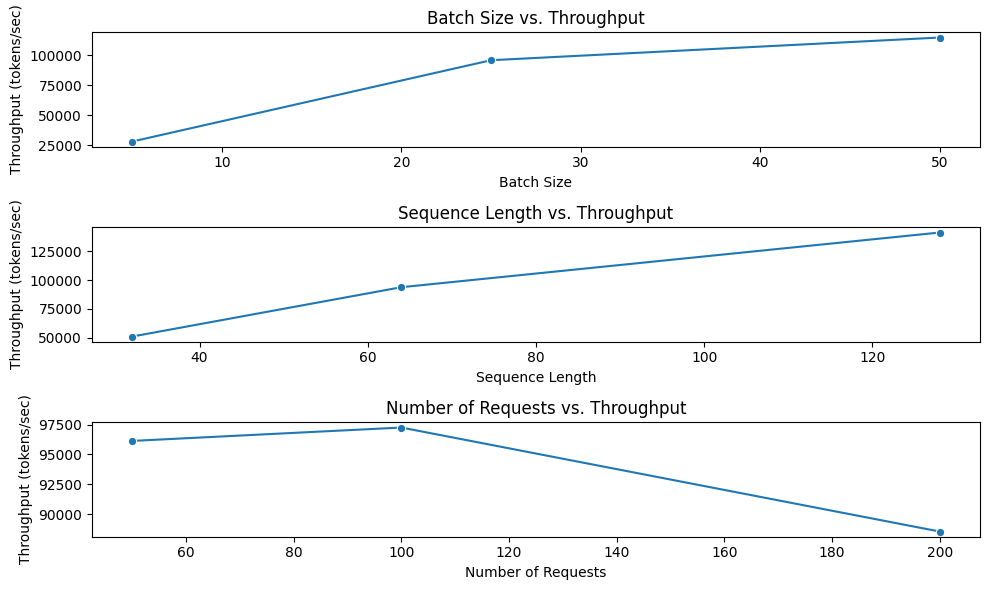

In [8]:
def run_all_experiments(model_name: str):
    """Run all experiments and create visualizations."""
    # YOUR CODE HERE
    # Define test vals (did smaller vals for time constraint)
    batch_sizes = [5, 25, 50]
    sequence_lengths = [32, 64, 128]
    request_counts = [50, 100, 200]

    # Get results
    batch_results = experiment_batch_sizes(model_name, batch_sizes)
    length_results = experiment_sequence_lengths(model_name, sequence_lengths)
    request_results = experiment_num_requests(model_name, request_counts)

    # Plot results
    plt.figure(figsize=(10, 6))

    # Batch size vs throughput
    plt.subplot(3, 1, 1)
    sns.lineplot(data=batch_results, x='batch_size', y='throughput', marker='o')
    plt.title('Batch Size vs. Throughput')
    plt.xlabel('Batch Size')
    plt.ylabel('Throughput (tokens/sec)')

    # Sequence Length vs throughput
    plt.subplot(3, 1, 2)
    sns.lineplot(data=length_results, x='sequence_length', y='throughput', marker='o')
    plt.title('Sequence Length vs. Throughput')
    plt.xlabel('Sequence Length')
    plt.ylabel('Throughput (tokens/sec)')

    # Number of requests vs throughput
    plt.subplot(3, 1, 3)
    sns.lineplot(data=request_results, x='num_requests', y='throughput', marker='o')
    plt.title('Number of Requests vs. Throughput')
    plt.xlabel('Number of Requests')
    plt.ylabel('Throughput (tokens/sec)')

    plt.tight_layout()
    plt.show()

    return batch_results, length_results, request_results


# Run experiments and store results:
batch_results, length_results, request_results = run_all_experiments('facebook/opt-125m')

  - Write a clear analysis of the results (2 points)


The results show that throughput increases steadily with larger batch sizes. This trend is expected as larger batch sizes allow for better GPU utilization by maximizing parallelism and reducing per-request overhead. I used an A100 GPU, which has a large amount of memory and computational power, throughput improves consistently up to the tested batch size of 50, without hitting resource limits. This highlights that on high-performance hardware, larger batch sizes can significantly enhance processing efficiency. However, on less capable GPUs, excessively large batch sizes may lead to memory bottlenecks or reduced performance.

Throughput increases with longer sequence lengths, which can be attributed to better GPU utilization as the workload per request grows. On the A100, shorter sequences underutilize the hardware, while longer sequences allow the GPU to process more tokens simultaneously, leveraging its computational capacity. However, this trend may plateau or reverse for extremely long sequences due to memory or compute constraints similar to batch size. It is evident the A100 GPU was more than enough for both the batch_size and sequence length experiments we have done so far (would have done larger batch_sizes and sequence lengths but was time constrained).

Throughput remains stable for smaller numbers of requests but starts to decline slightly as the total number of requests increases. This is due to the increased number of batches required to handle larger request counts, which introduces minor overhead in batching and processing. While this experiment does not simulate true concurrency, it highlights that batching is an effective strategy for maintaining throughput, even with higher numbers of requests. Proper batch size tuning could minimize the impact of this overhead.